In [ ]:
#An example of Bagging Classifier:

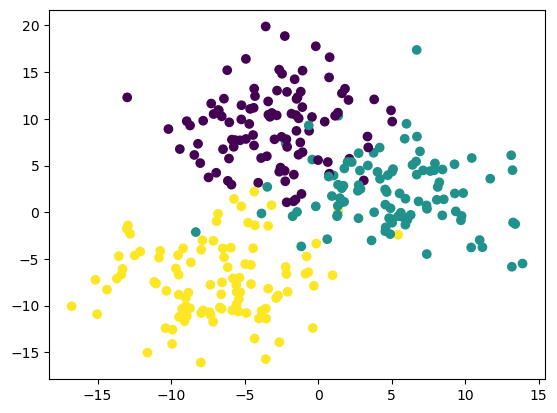

In [1]:
#Let's generate some random data from three classes

import matplotlib.pyplot as plt

# Generate data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=3,
                  cluster_std=4, random_state=42)

# Plot data
plt.scatter(X[:,0],X[:,1], c=y)

In [3]:
# Let's see the decision boundaries in case of a decision tree with maximum depth-2:

from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier class
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Grow a Decision Tree
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
import numpy as np

#boundaries
from matplotlib.colors import ListedColormap

def compute_decision_boundaries(clf, x, y, axes):
    x1s = np.linspace(axes[0], axes[1], 300)
    x2s = np.linspace(axes[2], axes[3], 300)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    
    return x1, x2, y_pred

def plot_feature_space(clf, x, y, axes):
    x1, x2, y_pred = compute_decision_boundaries(clf, x, y, axes)
    custom_cmap = ListedColormap(['y','b','r'])
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1, linewidth=1)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.figure(figsize=(10, 7))
    
  

C:\Users\user\AppData\Local\Temp\ipykernel_19024\969292305.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1, linewidth=1)


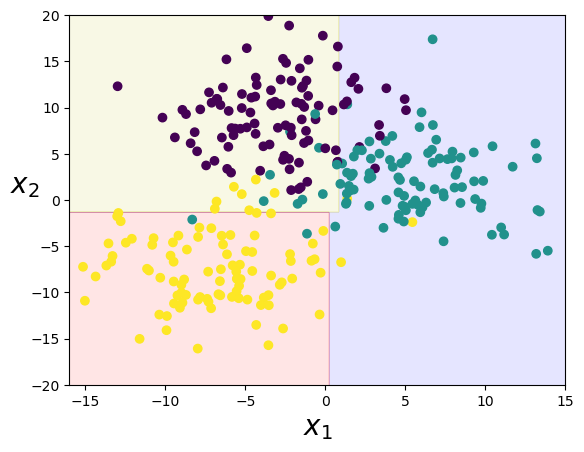

<Figure size 1000x700 with 0 Axes>

In [5]:
plot_feature_space(tree_clf, X, y, axes=[-16, 15, -20, 20])

In [6]:
# Let's see the decision boundaries in case of a decision tree with maximum depth-4:

from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier class
tree_clf = DecisionTreeClassifier(random_state=42)

# Grow a Decision Tree
tree_clf.fit(X, y)


DecisionTreeClassifier(random_state=42)

C:\Users\user\AppData\Local\Temp\ipykernel_19024\969292305.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1, linewidth=1)


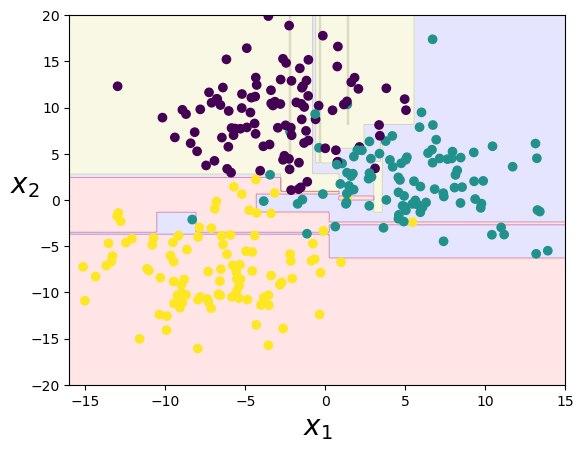

<Figure size 1000x700 with 0 Axes>

In [7]:
plot_feature_space(tree_clf, X, y, axes=[-16, 15, -20, 20])

In [9]:
# initialize the base classifier
base_cls = DecisionTreeClassifier(max_depth=3)
# no. of base classifier
num_trees = 500

from sklearn.ensemble import BaggingClassifier
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees)
model.fit(X, y)


C:\Users\user\anaconda3\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=500)

C:\Users\user\AppData\Local\Temp\ipykernel_19024\969292305.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1, linewidth=1)


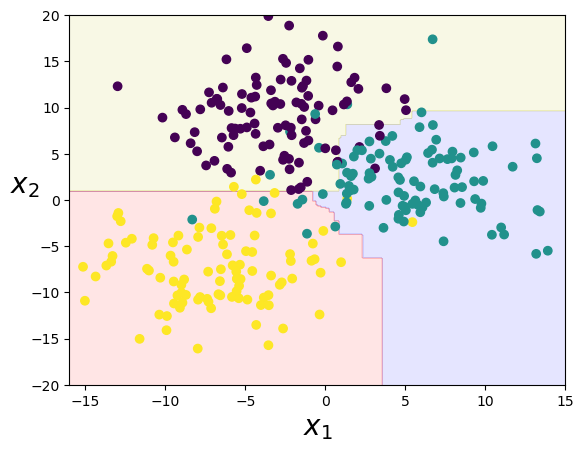

<Figure size 1000x700 with 0 Axes>

In [10]:
plot_feature_space(model, X, y, axes=[-16, 15, -20, 20])